In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import mplhep

mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
# %matplotlib inline

In [2]:
train_tree = uproot.open(
    {
        "/work/cetin/LHCb/reco_tuner/nn_electron_training/result_e_filterT_sample4/matching_ghost_mlp_training.root": "MatchNNDataSet/TrainTree"
    }
)
test_tree = uproot.open(
    {
        "/work/cetin/LHCb/reco_tuner/nn_electron_training/result_e_filterT_sample4/matching_ghost_mlp_training.root": "MatchNNDataSet/TestTree"
    }
)
train_array = train_tree.arrays()
test_array = test_tree.arrays()

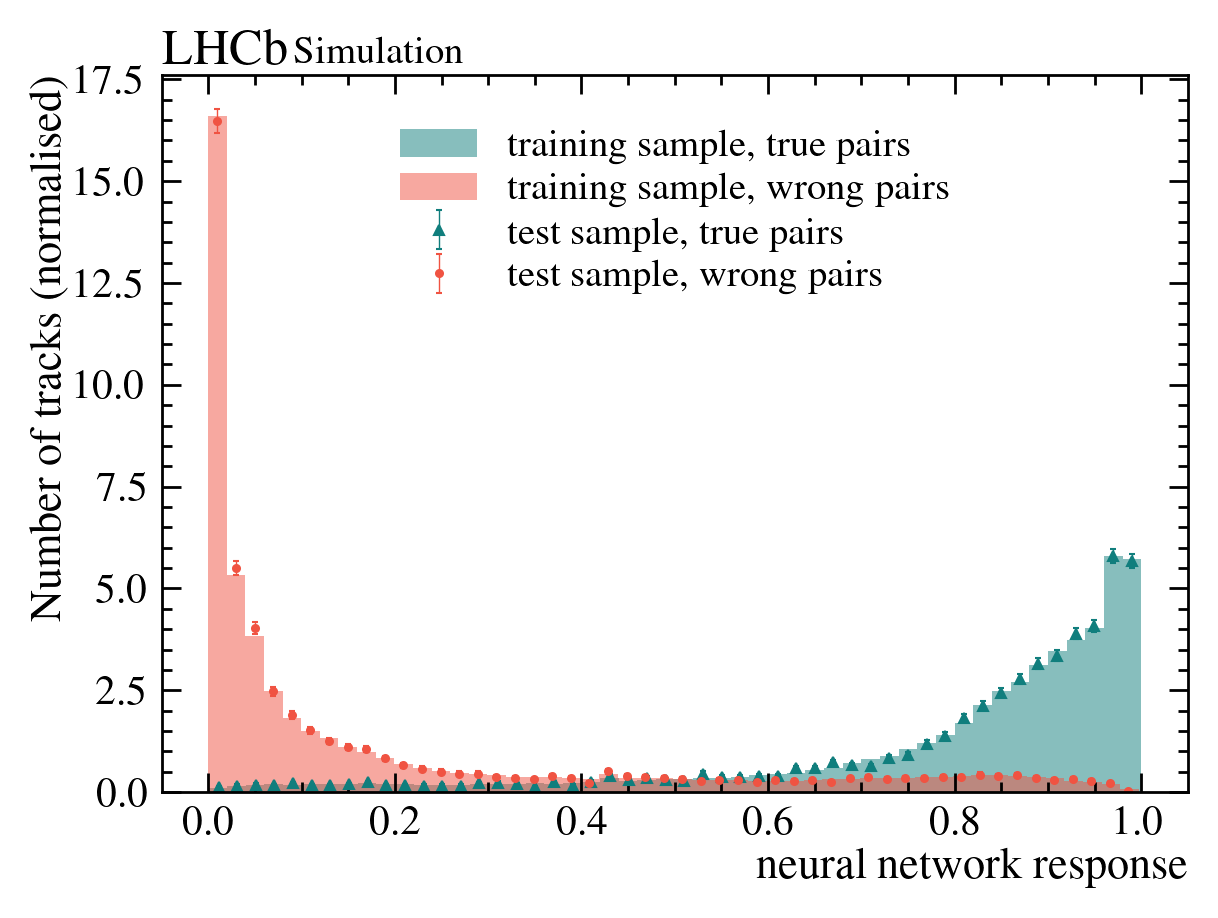

In [3]:
train_bkg = train_array[train_array.classID == 1]
train_sig = train_array[train_array.classID == 0]
test_bkg = test_array[test_array.classID == 1]
test_sig = test_array[test_array.classID == 0]
plt.hist(
    train_sig.matching_mlp,
    bins=50,
    alpha=0.5,
    density=True,
    color="#107E7D",
    label="training sample, true pairs",
)
plt.hist(
    train_bkg.matching_mlp,
    bins=50,
    alpha=0.5,
    density=True,
    color="#F05342",
    label="training sample, wrong pairs",
)
mplhep.histplot(
    np.histogram(np.array(test_sig.matching_mlp), 50),
    histtype="errorbar",
    density=True,
    yerr=True,
    color="#107E7D",
    marker="^",
    markersize=7,
    label="test sample, true pairs",
)
mplhep.histplot(
    np.histogram(np.array(test_bkg.matching_mlp), 50),
    histtype="errorbar",
    density=True,
    yerr=True,
    color="#F05342",
    label="test sample, wrong pairs",
)
plt.xlabel("neural network response")
plt.ylabel("Number of tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.legend(loc="upper center")
plt.savefig("/work/cetin/LHCb/reco_tuner/thesis/filtered_NN_elec_response.pdf",
            format="PDF")
# plt.show()

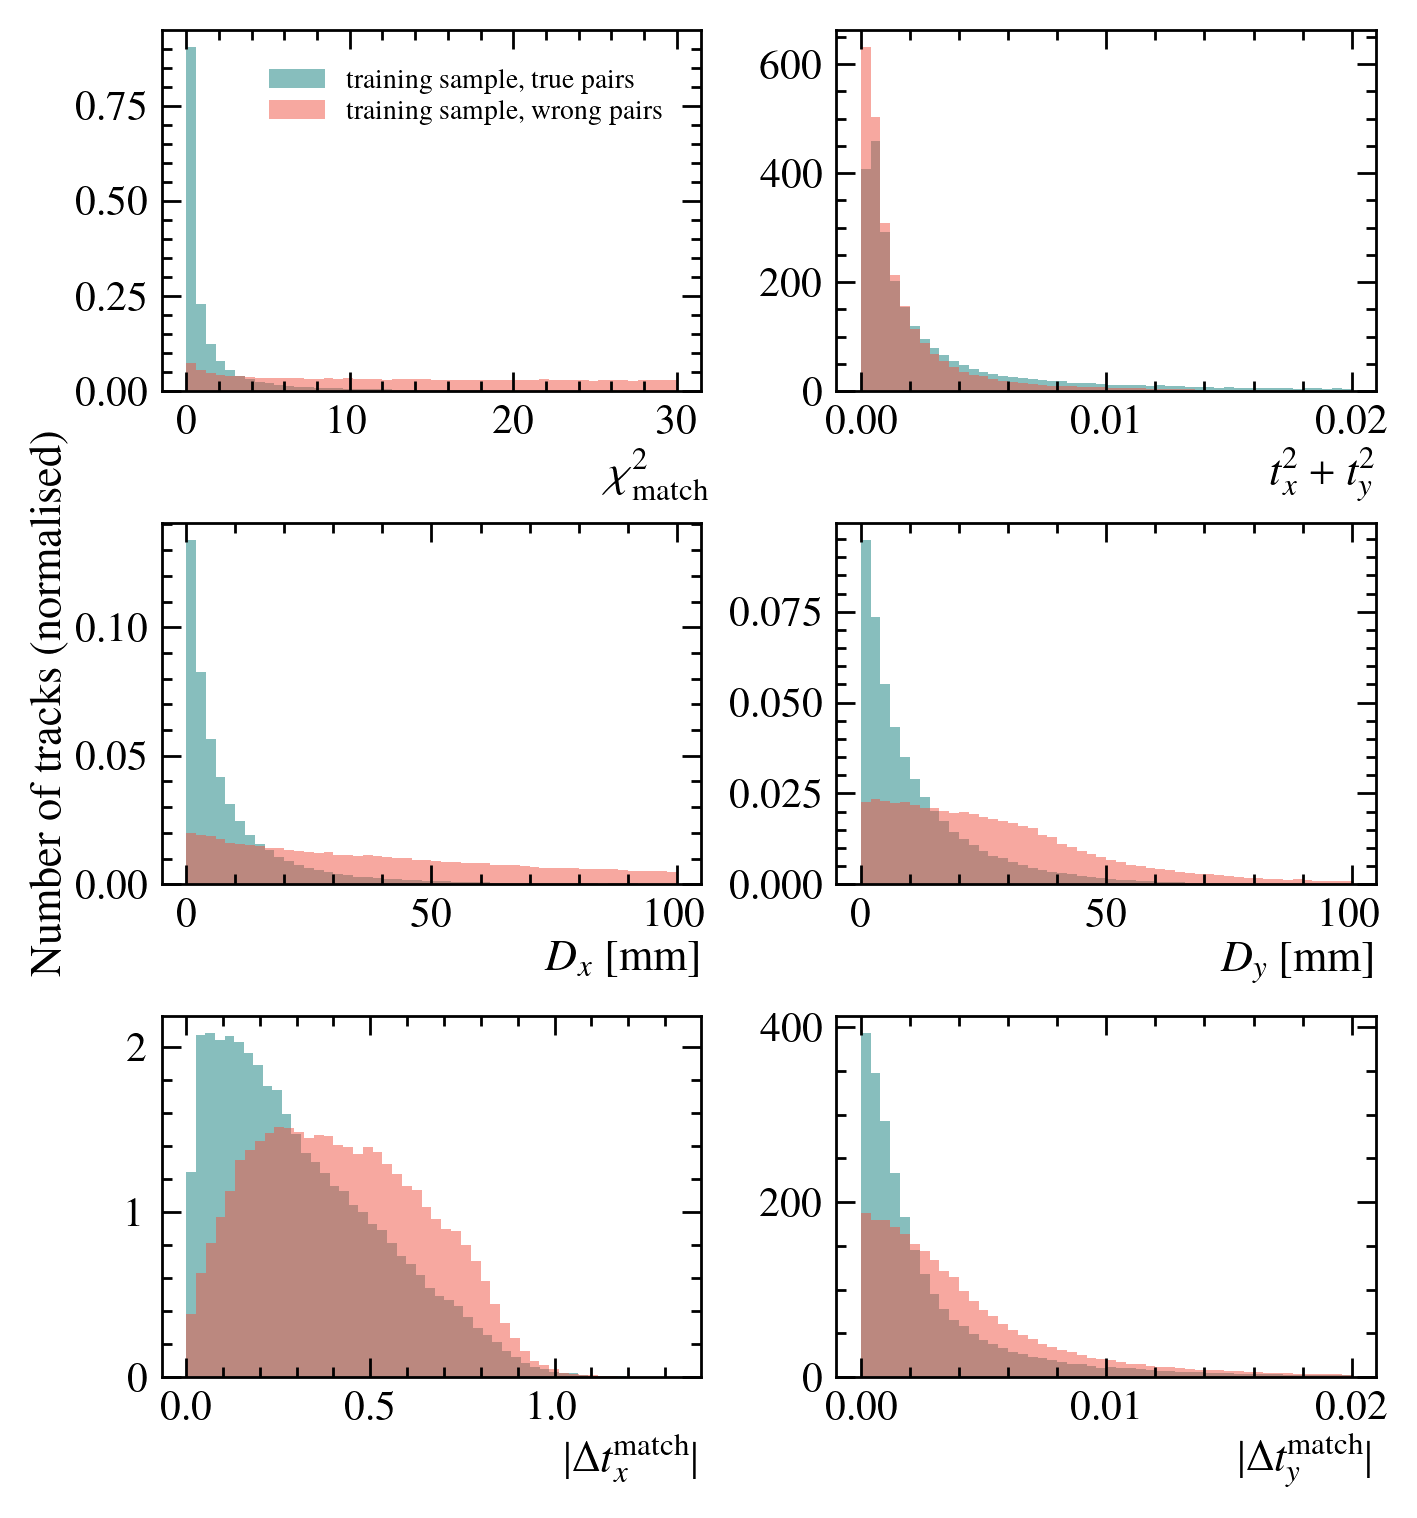

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15), sharey=False)
# 0,0
axes[0, 0].hist(
    train_sig.chi2,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[0, 0].hist(
    train_bkg.chi2,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[0, 0].set_xlabel(r"$\chi^{2}_{\mathrm{match}}$")
axes[0, 0].legend(prop={"size": 20})
# 1,0
axes[1, 0].hist(
    train_sig.distX,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[1, 0].hist(
    train_bkg.distX,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[1, 0].set_xlabel(r"$D_{x}$ [mm]")
axes[1, 0].set_ylabel("Number of tracks (normalised)", va="bottom", ha="center")
# 0,1
axes[0, 1].hist(
    train_sig.teta2,
    bins=50,
    range=(0.0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[0, 1].hist(
    train_bkg.teta2,
    bins=50,
    range=(0.0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[0, 1].set_xlabel(r"$t_{x}^{2}+t_{y}^{2}$")
# 1,1
axes[1, 1].hist(
    train_sig.distY,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[1, 1].hist(
    train_bkg.distY,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[1, 1].set_xlabel(r"$D_{y}$ [mm]")
# 2,0
axes[2, 0].hist(
    train_sig.dSlope,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[2, 0].hist(
    train_bkg.dSlope,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[2, 0].set_xlabel(r"$|\Delta t_{x}^{\mathrm{match}}|$")
# 2,1
axes[2, 1].hist(
    train_sig.dSlopeY,
    bins=50,
    range=(0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[2, 1].hist(
    train_bkg.dSlopeY,
    bins=50,
    range=(0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[2, 1].set_xlabel(r"$|\Delta t_{y}^{\mathrm{match}}|$")
plt.savefig(
    "/work/cetin/LHCb/reco_tuner/thesis/filtered_NN_elec_variables.pdf", format="PDF"
)
# plt.show()

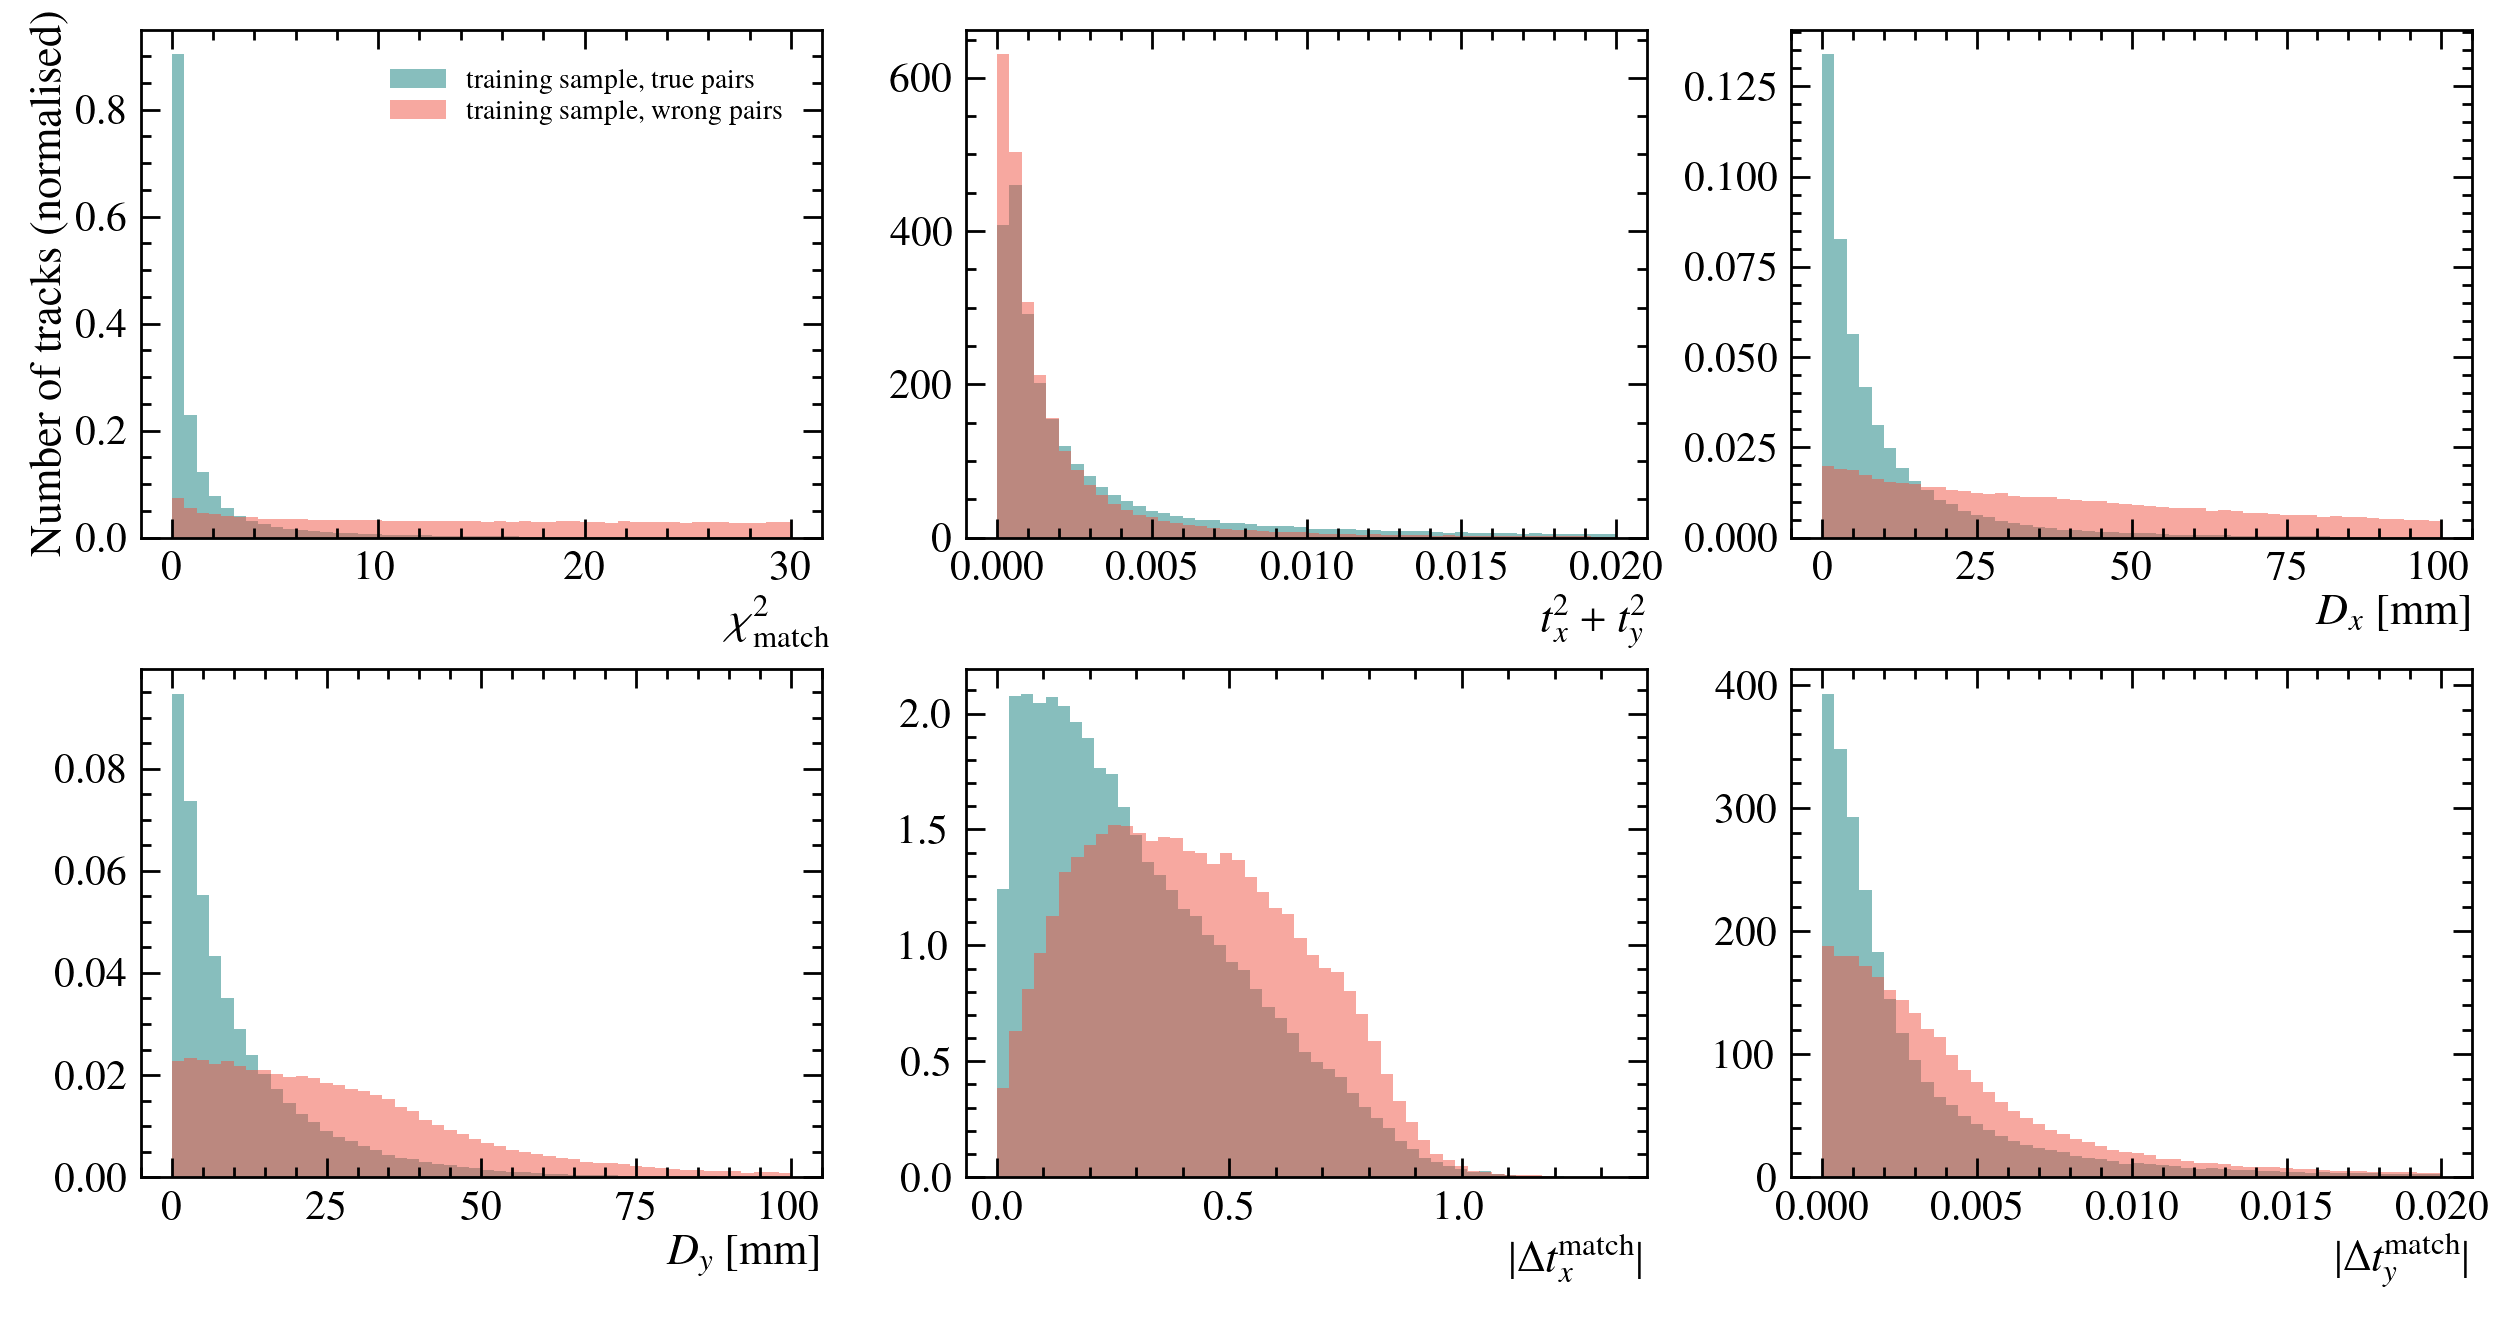

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(25, 13), sharey=False)
# 0,0
axes[0, 0].hist(
    train_sig.chi2,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[0, 0].hist(
    train_bkg.chi2,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[0, 0].set_xlabel(r"$\chi^{2}_{\mathrm{match}}$")
axes[0, 0].legend(prop={"size": 20})

# 0,1
axes[0, 1].hist(
    train_sig.teta2,
    bins=50,
    range=(0.0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[0, 1].hist(
    train_bkg.teta2,
    bins=50,
    range=(0.0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[0, 1].set_xlabel(r"$t_{x}^{2}+t_{y}^{2}$")
# 0,2
axes[0, 2].hist(
    train_sig.distX,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[0, 2].hist(
    train_bkg.distX,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[0, 2].set_xlabel(r"$D_{x}$ [mm]")
axes[0, 0].set_ylabel("Number of tracks (normalised)", va="bottom", ha="center")
# 1,0
axes[1, 0].hist(
    train_sig.distY,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[1, 0].hist(
    train_bkg.distY,
    bins=50,
    range=(0, 100),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[1, 0].set_xlabel(r"$D_{y}$ [mm]")
# 2,0
axes[1, 1].hist(
    train_sig.dSlope,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[1, 1].hist(
    train_bkg.dSlope,
    bins=50,
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[1, 1].set_xlabel(r"$|\Delta t_{x}^{\mathrm{match}}|$")
# 2,1
axes[1, 2].hist(
    train_sig.dSlopeY,
    bins=50,
    range=(0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#107E7D",
    label="training sample, true pairs",
)
axes[1, 2].hist(
    train_bkg.dSlopeY,
    bins=50,
    range=(0, 0.02),
    alpha=0.5,
    density=True,
    log=False,
    color="#F05342",
    label="training sample, wrong pairs",
)
axes[1, 2].set_xlabel(r"$|\Delta t_{y}^{\mathrm{match}}|$")
plt.savefig(
    "/work/cetin/LHCb/reco_tuner/thesis/filtered_NN_elec_variables_landscape.pdf",
    format="PDF",
)
# plt.show()